In [41]:
"""
卷积用法思路以及如何解决问题
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
train_x =pd.read_csv('train_july.csv')
test = pd.read_csv('test_july.csv')
train_y = train_x['label']

In [42]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [43]:
test.head()

,index,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
train_x =train_x.drop(['label'],axis=1)
train_x = train_x/255.0
test = test.drop(['index'],axis=1)
test = test/255.0

In [45]:
train_x = train_x.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

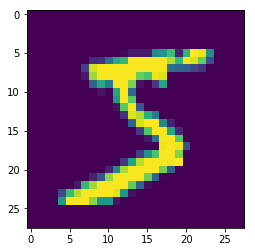

In [49]:
plt.imshow(train_x[0][:,:,0])

In [51]:
from keras.layers import Dense # 核心层，用来建立一个层
from keras.layers import Dropout # 正则化，无效化部分神经单元
from keras.layers import Conv2D # 卷积
from keras.layers import MaxPool2D #最大池化
from keras.layers import Flatten # 把多维转化为一维，用作全连接
from keras.optimizers import SGD,RMSprop #RMSprop :自适应学习率
from keras.models import Sequential # 
from keras.preprocessing.image import ImageDataGenerator
#当指标停止改进时降低学习率。
#一旦学习停滞，模型通常会将学习率降低2-10倍。该回调监视数量，如果“耐心”数量的时期没有看到改善，则学习速率降低。
from keras.callbacks import ReduceLROnPlateau


In [57]:
model = Sequential()
model.add(Conv2D(filters = 32,# 输出空间维数
                kernel_size=(5,5),# 指定卷积窗口宽度和高度
                padding='Same',#是否加边框
                activation='relu',# 激活函数
                input_shape=(28,28,1)))
# model.add(Conv2D(filters = 32, 
#                  kernel_size = (5,5),
#                  padding = 'Same', 
#                  activation ='relu',
#                  input_shape = (28,28,1)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [58]:
# 优化器
optimizer = RMSprop(lr=0.01,rho=0.9,epsilon=1e-08,decay=0.01)

In [59]:
# Compile the model
# 配置培训模型
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [60]:
# 回调模型速率
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=3, #没有改善得时期数，之后学习率会降低
                                           verbose=1, #状态
                                           factor=0.5, # 学习率降低得因素 new_lr = lr * factor
                                           min_lr=0.00001 # 学习率得下线
                                           )

In [61]:
epochs = 1
batch_size=86

In [62]:
#ImageDataGenerator：数据处理和图片数据增强（例如旋转，移动之类的）
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(train_x)

In [ ]:
history = model.fit_generator(datagen.flow(train_x,test,batch_size=batch_size),
                             epochs=epochs,va)